In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
data = df.copy()
df.shape

(100000, 9)

<Axes: title={'center': 'Diabetes Class Distribution'}, xlabel='diabetes'>

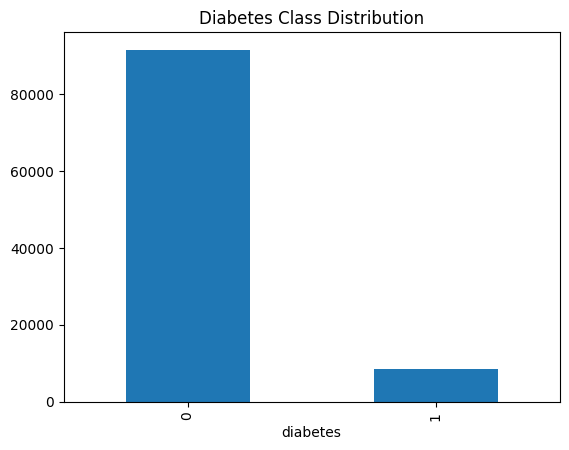

In [28]:
df.diabetes.value_counts().plot(kind='bar', title='Diabetes Class Distribution')

In [29]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes

In [30]:
#apply smote to balance the dataset
from imblearn.over_sampling import SMOTE
X = df.drop('diabetes', axis=1)
y = df['diabetes']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)




In [31]:
X_resampled.shape, y_resampled.shape

((183000, 8), (183000,))

diabetes
0    91500
1    91500
Name: count, dtype: int64


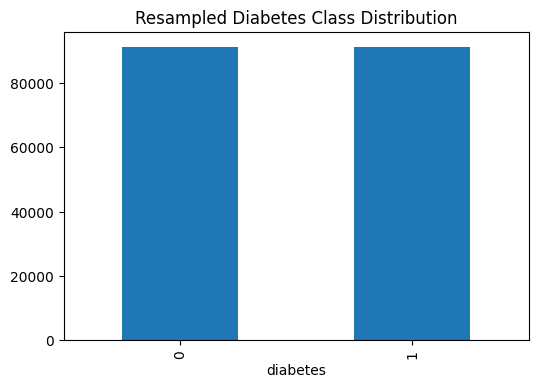

In [32]:
plt.figure(figsize=(6, 4))
y_resampled.value_counts().plot(kind='bar', title='Resampled Diabetes Class Distribution')

print(y_resampled.value_counts())

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18293
           1       0.98      0.97      0.97     18307

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600

Confusion Matrix:
[[17857   436]
 [  481 17826]]
Accuracy: 0.97


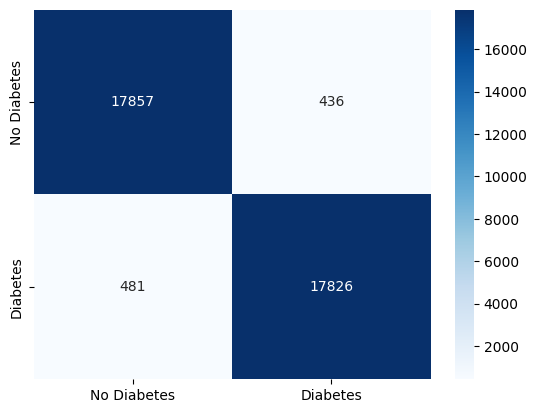

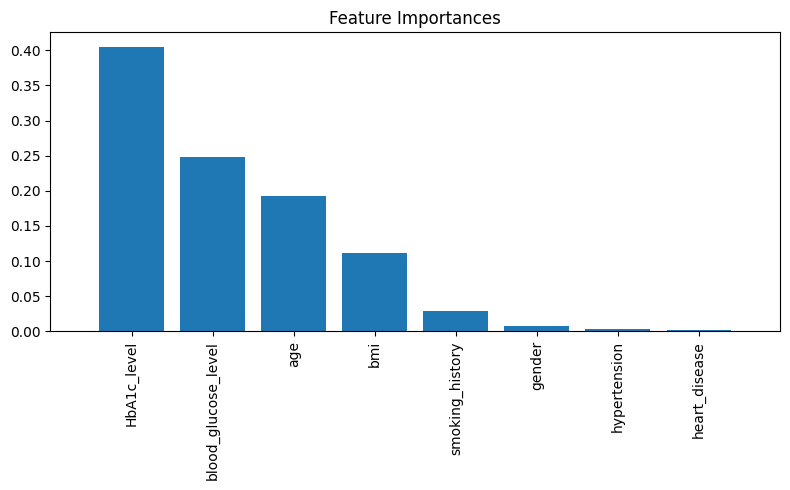

In [42]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])



accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


In [36]:
feature = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
}).to_csv('feature_importances.csv', index=False)

feature = pd.read_csv('feature_importances.csv')
print(feature)


               Feature  Importance
0          HbA1c_level    0.405275
1  blood_glucose_level    0.248127
2                  age    0.192838
3                  bmi    0.111964
4      smoking_history    0.028653
5               gender    0.007808
6         hypertension    0.003177
7        heart_disease    0.002158


In [37]:
#checking model by giving data
def check_model(data):
    data = scaler.transform([data])
    prediction = model.predict(data)
    return "Diabetic" if prediction[0] == 1 else "Non-Diabetic"

# Example usage
example_data = [12.1, 130, 550, 30, 0.5, 22, 211.3, 111]  # Example input data
result = check_model(example_data)
print(f"The model predicts: {result}")


The model predicts: Diabetic


C:\Users\manan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [45]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.Categorical(data[col]).codes



In [46]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [47]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)


In [48]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Xtrain, ytrain)
y_pred = rf.predict(Xtest)


In [49]:
print("Classification Report:")
print(classification_report(ytest, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



Confusion Matrix:
[[18234    58]
 [  527  1181]]


<Axes: >

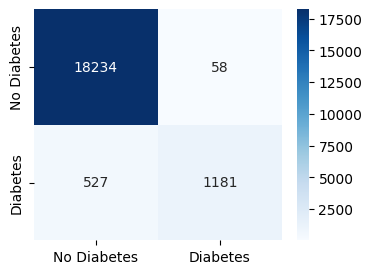

In [65]:
plt.figure(figsize=(4,3))
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred))
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])

Predicted Values Count:
0    18761
1     1239
Name: count, dtype: int64


<Axes: title={'center': 'Predicted Diabetes Class Distribution'}>

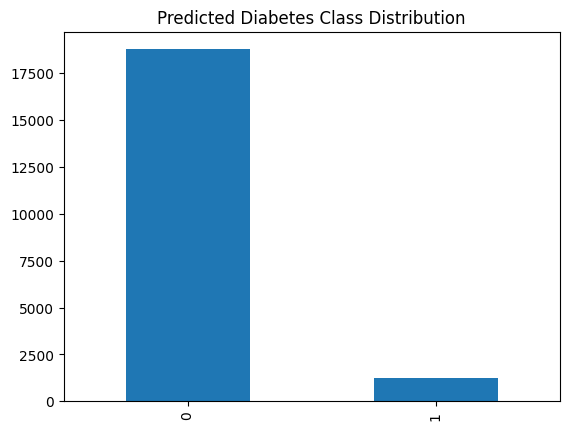

In [57]:
#check ypred valuecounta
print("Predicted Values Count:")
print(pd.Series(y_pred).value_counts())

pd.Series(y_pred).value_counts().plot(kind='bar', title='Predicted Diabetes Class Distribution')

In [58]:
print("accuracy:", accuracy_score(ytest, y_pred))

accuracy: 0.97075
